In [0]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def crop(x=0, path='',visualize=False, resize=False):
  '''
  This function will crop the MRI scan.
  Thresholding and other commonly used imaging techniques has been used.
  
  Inputs:
  'x' represents the numpy array of the MRI scan. 
  'path' represents path of the image. Need to make changes in the code for .nii files
  'visualize' when True will display the input as well as cropped image.
  By default, function won't display the image.
  'resize' when True will resize the processed image to the same size as imput image. Using this may distort the image slightly
  
  Output:
  'imp_cropped' represents the cropped image
  '''
  
  if not path:
    img = x
  else :
    yolo = pydicom.dcmread(path)
    img = np.asarray(yolo.pixel_array)
  #Change the threshold value if the contrast of the iamge changes
  threshold = 20
  
  img1 = np.int16(img > threshold)
  img1 = cv2.medianBlur(img1, 5)
  kernel = np.ones((3,3),np.uint8)
  img1 = cv2.erode(img1,kernel,iterations=5)
  img1 = cv2.dilate(img1,kernel,iterations=7)
  img1 = cv2.morphologyEx(img1,cv2.MORPH_OPEN, kernel)
  img1 = cv2.morphologyEx(img1,cv2.MORPH_CLOSE, kernel)
  img1 = cv2.convertScaleAbs(img1)

  _, contours, _ = cv2.findContours(img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print(len(contours))
  largest_area = 0

  for contour in contours:
    [x, y, w, h] = cv2.boundingRect(contour)
    cv2.rectangle(img1, (x, y), (x + w, y + h), (100, 0, 100), 1)
    if((img.shape)!=(h,w)):
      a = cv2.contourArea(contour)
      if((a>=largest_area)):
        largest_area = a
        rect = cv2.boundingRect(contour)

  x,y,w,h = rect
  cv2.rectangle(img1, (x, y), (x + w, y + h), (200, 0, 200), 1)

  img_cropped = img[y:y+h, x:x+w]
  
  if resize:
    img2 = img_cropped.resize(img.shape)
  
  if visualize:
    fig, ax = plt.subplots(1,2, figsize = (12,12))
    ax[0].imshow(img, )
    ax[1].imshow(img_cropped, )
    plt.show()

  return img_cropped

3


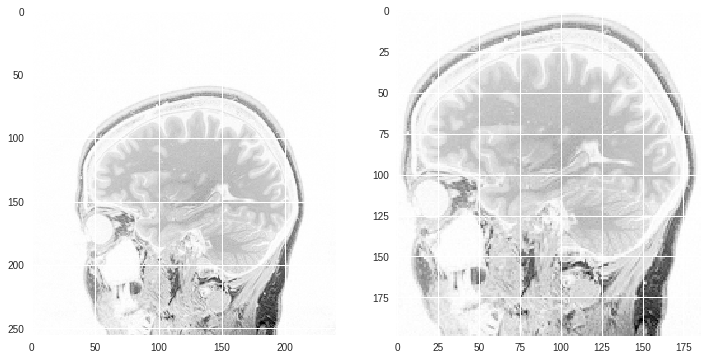

(199, 186)


In [0]:
yolo = pydicom.dcmread('image fusion/sample/raw2.dcm')
img = np.asarray(yolo.pixel_array)

img2 = crop(x = img, visualize=True)
print(img2.shape)